# Part A

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# SIR model differential equations
def sir_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Part B

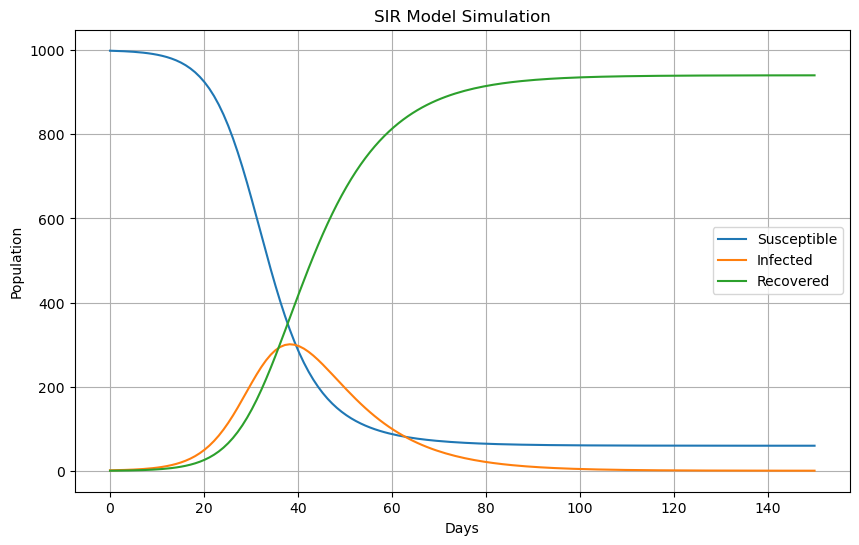

In [9]:
from scipy.integrate import odeint

# Initial conditions
N = 1000
I0, R0 = 1, 0
S0 = N - I0 - R0
beta = 0.3 / N
gamma = 0.1

# Time grid (150 days)
t = np.linspace(0, 150, 150)

solution = odeint(sir_model, [S0, I0, R0], t, args=(beta, gamma))
S, I, R = solution.T

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.title('SIR Model Simulation')
plt.xlabel('Days')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.show()


# Part C

## part i

In [10]:
peak_day = t[np.argmax(I)]
peak_infections = max(I)
print(f"Peak occurs on day {peak_day} with {int(peak_infections)} infections.")

Peak occurs on day 38.255033557046985 with 300 infections.


infection is high when there is a significant reduction in susceptible population and the factors contributing to this peak are beta (transmission rate) and gamma (recovery rate).

## part ii

In [11]:
R0 = beta / gamma
print(f"R0 = {R0}")

R0 = 0.0029999999999999996


R0 > 1 indicates potential outbreak. Higher R0 indicates that each infected person is going to transmit the disease to more people, implying faster spread of infection. As more people are infected, the susceptible population decreases, which might lead to shorter duration of the pandemic. Public health measures aim to keep R0 low by quarantining infected indivduals, encouraging masking and social distancing to decrease the transmission rate, and by also increasing the recovery rate by offering medical treatments like vaccines.

## part iii

At the beginning of a pandemic, there are roughly as many Susceptible (S) population as there are people in the total population, and the number of Infected (I) people is small. Susceptible people contract the disease when coming into contact with an infected one; eventually, over time, the population of S decreases. This feeds an exponential growth of the I population until the S population has diminished enough to reduce the rate of new infection. Meanwhile, the infected individuals move into the recovered compartment (R) as they recover, which also starts growing from zero and then increases consistently.

Ultimately, the infected population begins to stabilize when the recovery rate starts outweighing the rate of new infections. Therefore, both the infected and the recovered populations reach a state of stability. Dynamic coupling between the three compartments determines the system behavior: S and I together are responsible for determining the rate of new infections, while I and R drive the recovery process. When the susceptible population decreases, infection slows down and gradually diminishes, thus describing a scenario of disease control and immunity gain within the population.

# Part D

## part i

In [12]:
def seir_model(y, t, N, beta, sigma, gamma, mu):
    S, E, I, R = y
    dSdt = mu * N - beta * S * I - mu * S
    dEdt = beta * S * I - (sigma + mu) * E
    dIdt = sigma * E - (gamma + mu) * I
    dRdt = gamma * I - mu * R
    return [dSdt, dEdt, dIdt, dRdt]


## part ii

In [13]:
# Initial conditions
S0, E0, I0, R0 = 990, 9, 1, 0
N = S0 + E0 + I0 + R0
beta = 0.3 / N
sigma = 0.2
gamma = 0.1
mu = 0.01

# Time grid (365 and 1200 days)
t1 = np.linspace(0, 365, 365)
t2 = np.linspace(0, 1200, 1200)

solution_365 = odeint(seir_model, [S0, E0, I0, R0], t1, args=(N, beta, sigma, gamma, mu))
solution_1200 = odeint(seir_model, [S0, E0, I0, R0], t2, args=(N, beta, sigma, gamma, mu))

# Extracting compartments
S_365, E_365, I_365, R_365 = solution_365.T
S_1200, E_1200, I_1200, R_1200 = solution_1200.T


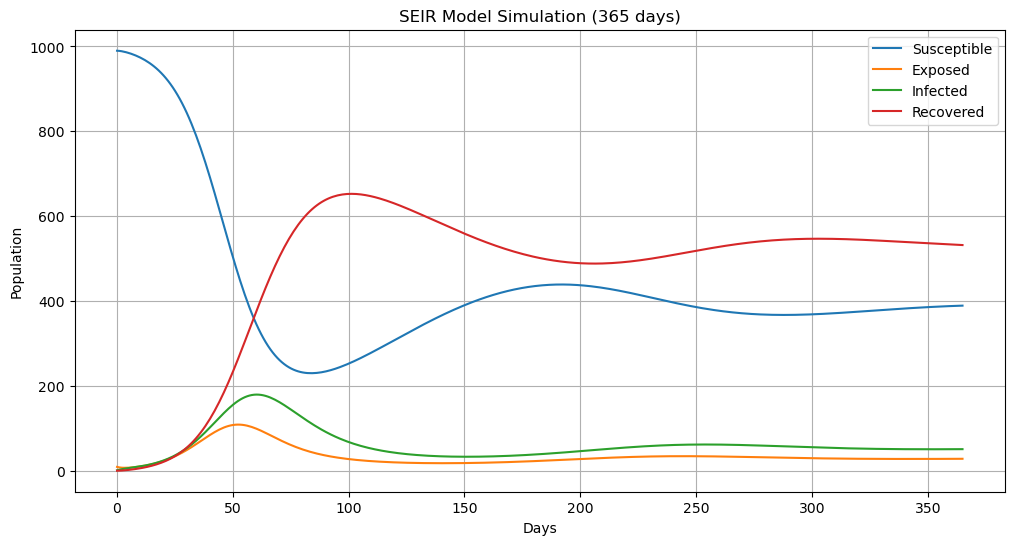

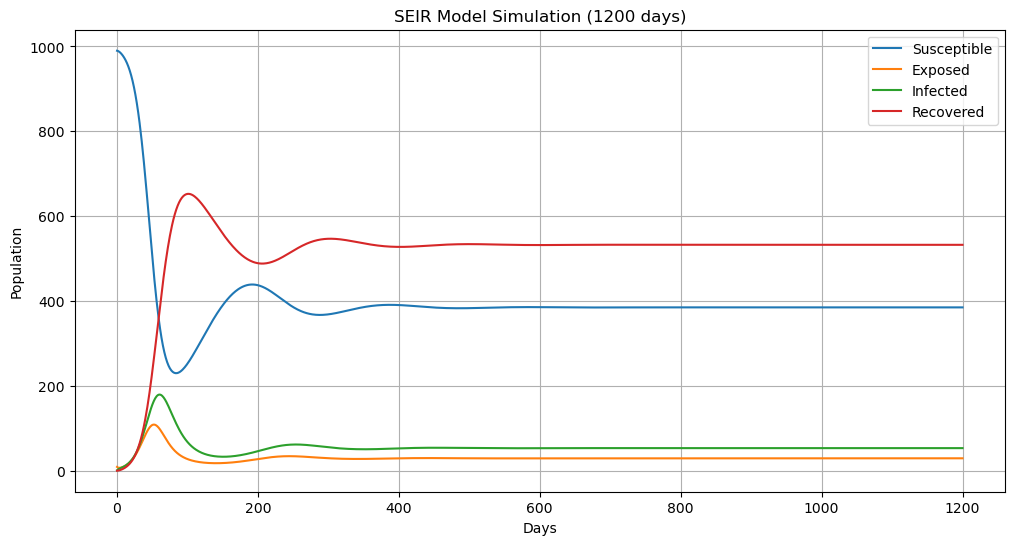

In [14]:
# Plotting results for 365 days
plt.figure(figsize=(12, 6))
plt.plot(t1, S_365, label='Susceptible')
plt.plot(t1, E_365, label='Exposed')
plt.plot(t1, I_365, label='Infected')
plt.plot(t1, R_365, label='Recovered')
plt.title('SEIR Model Simulation (365 days)')
plt.xlabel('Days')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.show()

# Plotting results for 1200 days
plt.figure(figsize=(12, 6))
plt.plot(t2, S_1200, label='Susceptible')
plt.plot(t2, E_1200, label='Exposed')
plt.plot(t2, I_1200, label='Infected')
plt.plot(t2, R_1200, label='Recovered')
plt.title('SEIR Model Simulation (1200 days)')
plt.xlabel('Days')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.show()


## part iii

We see from the SEIR model simulations for a period of 365 and 1200 days that the infection peaks depend on the delay caused by the exposed compartment. The infected population increases initially because of the huge susceptible population. However, the infection does not spread in an instance, as there is an added stage for exposed. Over longer timescales, such as 1200 days, there are numerous waves of infection, each reflecting the replenishing of the susceptible population due to newborns and the dynamics between S, E, and I. These kinds of waves can model real-world periodic outbreaks, and they are significant examples of how the exposed phase could help to keep the spread of the infection in check.

## part iv

The exposed (E) compartment adds a delay to the susceptible individual becoming infectious. This smoothes out the infection curve, spreading cases over a longer period of time. The sharp peak is less likely, but the outbreak will be longer; see the extended simulation for 1200 days. The presence of the E compartment can create a buffer that mitigates sudden spikes in infections and is considered a more realistic model regarding disease incubation periods.

A higher birth rate increases the susceptible population over time, which could result in recurring waves of infections, as can be seen from this 1200-day simulation. A higher death rate reduces the entire population of susceptible plus infected, which again cuts peaks and slows the rate of infection. The balance between births and deaths determines the long-term dynamics of the pandemic, where it would either persist or stabilize.

# Part E

## part i

In [15]:
beta_values = np.linspace(0.1 / N, 0.5 / N, 5)
sigma_values = np.linspace(0.05, 0.2, 5)

# Peak infection results
peak_infections = []
total_infections = []

for beta in beta_values:
    for sigma in sigma_values:
        sol = odeint(seir_model, [S0, E0, I0, R0], t1, args=(N, beta, sigma, gamma, mu))
        S, E, I, R = sol.T
        peak_infections.append(max(I))
        total_infections.append(N - min(S))

peak_infections = np.array(peak_infections).reshape(len(beta_values), len(sigma_values))
total_infections = np.array(total_infections).reshape(len(beta_values), len(sigma_values))


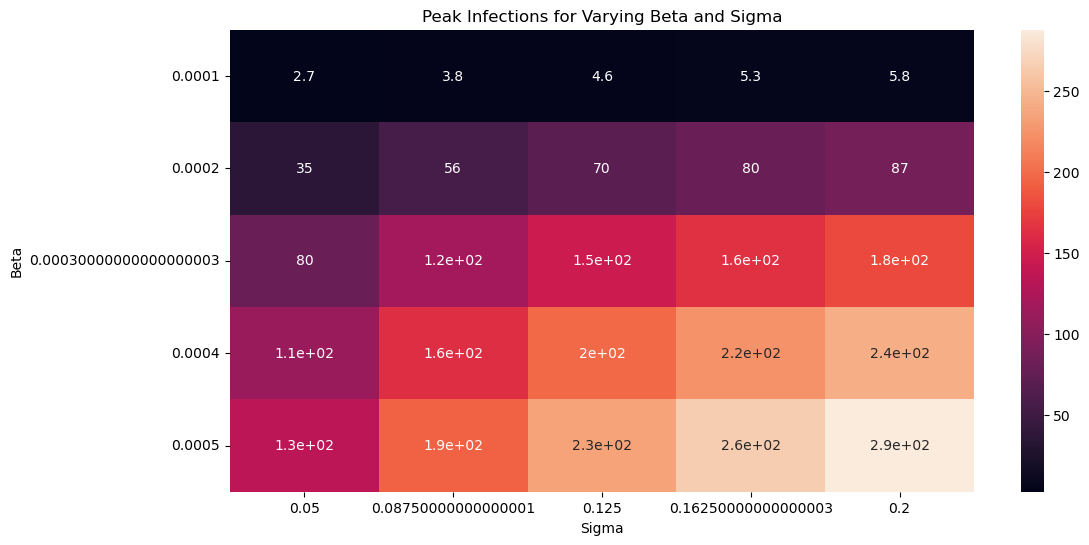

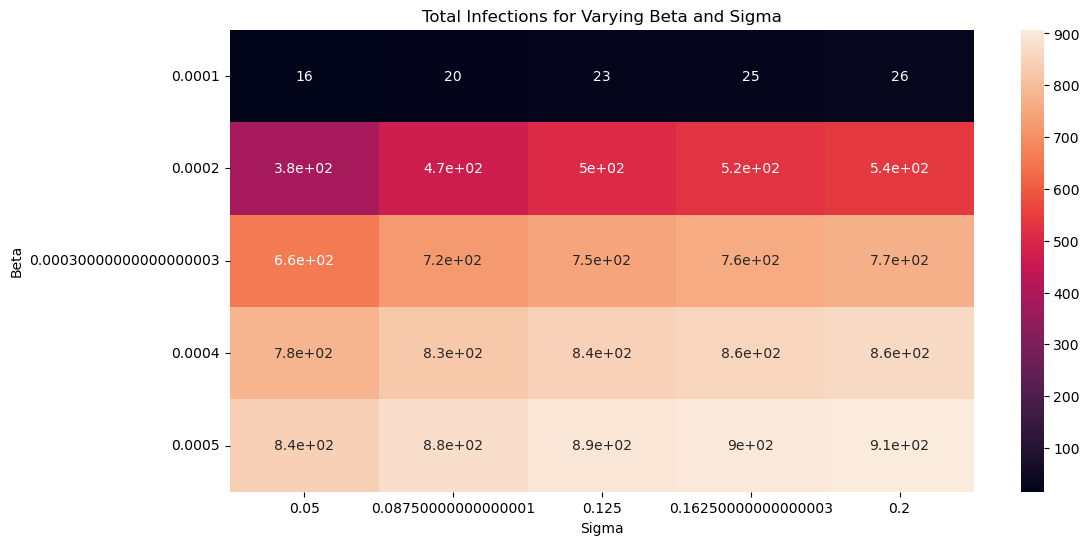

In [16]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(peak_infections, annot=True, xticklabels=sigma_values, yticklabels=beta_values)
plt.title('Peak Infections for Varying Beta and Sigma')
plt.xlabel('Sigma')
plt.ylabel('Beta')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(total_infections, annot=True, xticklabels=sigma_values, yticklabels=beta_values)
plt.title('Total Infections for Varying Beta and Sigma')
plt.xlabel('Sigma')
plt.ylabel('Beta')
plt.show()


## part ii

These heat maps show changes in peak infections and the total number of infections over a year by changing β-transmission rate, and σ-exposed-to-infectious rate.

Peak Infection: Larger values of β result in larger peaks since a faster transmission rate results in more individuals infected at any given time. Larger σ, or a more rapid development from exposed to infectious, increases the peak since infected persons become infectious sooner and spread the disease more rapidly.

Total Infection: Total infections over a year increase with β, which reflects the more widespread disease transmission. The changes in σ have a smaller effect on total infections but affect the time and spread.

## part iii

As social distancing, mask-wearing, and lockdowns reduce β, the peak and total infections are also reduced. A smaller β flattens the curve and avoids healthcare system overload.
Although this is not exhibited in the actual plots themselves, an increased γ through medications decreases the infectious period. Due to this, β indirectly decreases as the time available for spreading of the disease has now been decreased. Improved medical care also decreases mortality and hastens the containment of a pandemic.
Public health interventions can effectively control peaks of infection and total spread by targeting behavioral interventions at β and medical advances at γ, thereby minimizing impacts on society and healthcare.